<a href="https://colab.research.google.com/github/Er-AI-GK/DCCN-LAB-PROGRAMS/blob/main/DA_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NameError: ignored

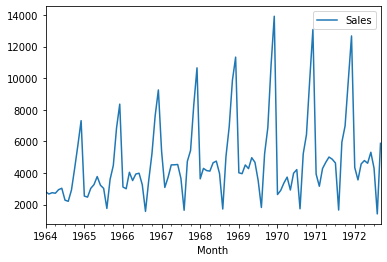

In [13]:
#TIME SERIES 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels as sm 
sm.__version__ 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT LAB/voice.csv') 
df.head() 
df.tail() 
# df.drop([106,105],axis=0,inplace=True) 
df.columns=["Month","Sales"] 
df.head() 
df['Month']=pd.to_datetime(df['Month']) 
df.set_index('Month',inplace=True) 
df.head() 
df.describe() 
df.plot() 

from statsmodels.tsa.stattools import adfuller 

def adfuller_test(sales): 
  result = adfuller(sales) 
  labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used'] 
  for value,label in zip(result,labels): 
    print(label + ': ' + str(value)) 
      
if result[1] <= 0.05: 
  print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary') 
else: 
  print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.') 

adfuller_test(df['Sales']) 
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1) 
df['Sales'].shift(1).head() 
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12) 
adfuller_test(df['Seasonal First Difference'].dropna()) 
df['Seasonal First Difference'].plot() 

from pandas.plotting import autocorrelation_plot 
autocorrelation_plot(df['Sales']) 
plt.show() 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
fig = plt.figure(figsize=(12,8)) 
ax1 = fig.add_subplot(211) 
fig = sm.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1) 
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)  

Estimated coefficients:
b_0 = 1.2363636363636363 		
b_1 = 1.1696969696969697


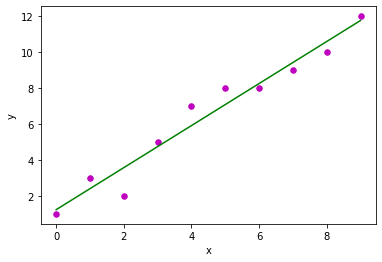

In [9]:
#REGRESSION

import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('x')
	plt.ylabel('y')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


In [14]:
# Importing library
from scipy.stats import f_oneway

data1 = [89, 89, 88, 78, 79]
data2 = [93, 92, 94, 89, 88]
data3 = [89, 88, 89, 93, 90]
data4 = [81, 78, 81, 92, 82]

# one-way ANOVA output
f_oneway(data1, data2, data3, data4)


F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

In [16]:
# T TEST
sys_bp=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138] 
mu=165 
from scipy import stats 
t_value,p_value=stats.ttest_1samp(sys_bp,mu) 
one_tailed_p_value=float("{:.6f}".format(p_value/2))
# Since alternative hypothesis is one tailed, We need to divide the p value by 2. 
print('Test statistic is %f'%float("{:.6f}".format(t_value))) 
print('p-value for one tailed test is %f'%one_tailed_p_value) 
alpha = 0.05 
if one_tailed_p_value<=alpha: 
 print('Conclusion','n','Since p value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that there is no significant mean difference in systolic blood pressure. i.e., μ = 165 at %.2f level of 
significance'''%alpha) 
else: 
 print('Conclusion','n','Sincep-value(=%f)'%one_tailed_p_value, '>', 'alpha(=%.2f)'%alpha,'We do not reject the null hypothesis H0.') 


Test statistic is -1.243183
p-value for one tailed test is 0.117877
Conclusion n Sincep-value(=0.117877) > alpha(=0.05) We do not reject the null hypothesis H0.


In [17]:
# Z TEST

import math 
import numpy as np 
from numpy.random import randn 
from statsmodels.stats.weightstats import ztest 

mean= 3.4 
sd = 2.61/math.sqrt(900) 
alpha =0.05 
population_mean = 3.25 
data = sd*randn(900)+mean 

# print mean and sd 
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data))) 

# now we perform the test. In this function, we passed data, in the value parameter 
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the 
# mean is larger 

ztest_Score, p_value= ztest(data,value = population_mean, alternative='larger') 
print(p_value) 
print(alpha) 

if(p_value < alpha): 
  print("H0 accepted") 
else: 
  print(" Reject Hypothesis") 

mean=3.41 stdv=0.09
0.0
0.05
H0 accepted


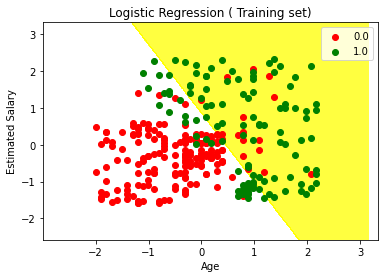

In [3]:
#LOGISTIC REGRESSION

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
datasets = pd.read_csv('/content/drive/MyDrive/Raj anand.csv') 
X = datasets.iloc[:, [2,3]].values 
Y = datasets.iloc[:, 4].values 
from sklearn.model_selection import train_test_split 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state= 0) 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_Train = sc_X.fit_transform(X_Train) 
X_Test = sc_X.transform(X_Test) 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_Train, Y_Train) 
Y_Pred = classifier.predict(X_Test) 
from matplotlib.colors import ListedColormap 
X_Set, Y_Set = X_Train, Y_Train 
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() 
+1, step = 0.01), 
 np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 
0.01)) 
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), 
X2.ravel()]).T).reshape(X1.shape), 
 alpha = 0.75, cmap = ListedColormap(('white', 'yellow'))) 
plt.xlim(X1.min(), X2.max()) 
plt.ylim(X2.min(), X2.max()) 
for i, j in enumerate(np.unique(Y_Set)): 
 plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1], 
 c = ListedColormap(('red', 'green'))(i), label = j) 
plt.title('Logistic Regression ( Training set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show()


In [18]:
# RANDOM SAMPLING  

# Python3 program to demonstrate
# the use of sample() function .

# import random
import random


# Prints list of random items of
# length 3 from the given list.
list1 = [1, 2, 3, 4, 5, 6]
print("With list:", random.sample(list1, 3))

# Prints list of random items of
# length 4 from the given string.
string = "GeeksforGeeks"
print("With string:", random.sample(string, 4))

# Prints list of random items of
# length 4 from the given tuple.
tuple1 = ("ankit", "geeks", "computer", "science",
				"portal", "scientist", "btech")
print("With tuple:", random.sample(tuple1, 4))


# Prints list of random items of
# length 3 from the given set.
set1 = {"a", "b", "c", "d", "e"}
print("With set:", random.sample(set1, 3))



With list: [5, 2, 1]
With string: ['e', 'f', 'k', 'k']
With tuple: ['ankit', 'scientist', 'science', 'btech']
With set: ['b', 'a', 'd']


In [20]:
# random sampling using data set

import pandas as pd

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLT LAB/voice.csv')
data.sample(5)

,Month,champange
42,1967-07,3663
37,1967-02,3088
71,1969-12,13916
97,1972-02,3564
34,1966-11,7614
